In [1145]:
import numpy as np
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from itertools import combinations 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import tree
import pickle
from scipy import stats
from tempfile import TemporaryFile
import csv

In [1146]:
def preprocess(data):

    smoking_index = data[0].index('Smoking')
    alcohol_index = data[0].index('Alcohol')
    punctuality_index = data[0].index('Punctuality')
    lying_index = data[0].index('Lying')
    internet_usage_index = data[0].index('Internet usage')
    gender_index = data[0].index('Gender')
    hand_index = data[0].index('Left - right handed')
    education_index = data[0].index('Education')
    child_index = data[0].index('Only child')
    village_index = data[0].index('Village - town')
    house_index = data[0].index('House - block of flats')
    empathy_index = data[0].index('Empathy')

    for i in range(1, len(data)):
        if(data[i][empathy_index]=='1' or data[i][empathy_index]=='2' or data[i][empathy_index]=='3'):
            data[i][empathy_index]='0'
        elif(data[i][empathy_index]=='4' or data[i][empathy_index]=='5'):
            data[i][empathy_index]='1'

        if(data[i][smoking_index]=='never smoked'):
            data[i][smoking_index] = 0
        elif(data[i][smoking_index]=='tried smoking'):
            data[i][smoking_index] = 1
        elif(data[i][smoking_index]=='former smoker'):
            data[i][smoking_index] = 2
        elif(data[i][smoking_index]=='current smoker'):
            data[i][smoking_index] = 3

        if(data[i][alcohol_index]=='never'):
            data[i][alcohol_index] =0
        elif(data[i][alcohol_index]=='social drinker'):
            data[i][alcohol_index] =1
        elif(data[i][alcohol_index]=='drink a lot'):
            data[i][alcohol_index]=2

        if(data[i][punctuality_index]=='i am often early'):
            data[i][punctuality_index] =0
        elif(data[i][punctuality_index]=='i am always on time'):
            data[i][punctuality_index] =1
        elif(data[i][punctuality_index]=='i am often running late'):
            data[i][punctuality_index]=2

        if(data[i][lying_index]=='never'):
            data[i][lying_index] =0
        elif(data[i][lying_index]=='only to avoid hurting someone'):
            data[i][lying_index] =1
        elif(data[i][lying_index]=='sometimes'):
            data[i][lying_index]=2
        elif(data[i][lying_index]=='everytime it suits me'):
            data[i][lying_index]=3

        if(data[i][internet_usage_index]=='no time at all'):
            data[i][internet_usage_index] =0
        elif(data[i][internet_usage_index]=='less than an hour a day'):
            data[i][internet_usage_index] =1
        elif(data[i][internet_usage_index]=='few hours a day'):
            data[i][internet_usage_index]=2
        elif(data[i][internet_usage_index]=='most of the day'):
            data[i][internet_usage_index] =0

        if(data[i][gender_index]=='male'):
            data[i][gender_index] =0
        elif(data[i][gender_index]=='female'):
            data[i][gender_index] =1

        if(data[i][hand_index]=='left handed'):
            data[i][hand_index] =0
        elif(data[i][hand_index]=='right handed'):
            data[i][hand_index] =1

        if(data[i][education_index]=='currently a primary school pupil'):
            data[i][education_index] =0
        elif(data[i][education_index]=='primary school'):
            data[i][education_index] =1
        elif(data[i][education_index]=='secondary school'):
            data[i][education_index] =2
        elif(data[i][education_index]=='college/bachelor degree'):
            data[i][education_index]=3
        elif(data[i][education_index]=='masters degree'):
            data[i][education_index] =4
        elif(data[i][education_index]=='doctorate degree'):
            data[i][education_index] =5


        if(data[i][child_index]=='no'):
            data[i][child_index] =0
        elif(data[i][child_index]=='yes'):
            data[i][child_index] =1

        if(data[i][village_index]=='city'):
            data[i][village_index] =0
        elif(data[i][village_index]=='village'):
            data[i][village_index] =1

        if(data[i][house_index]=='block of flats'):
            data[i][house_index] =0
        elif(data[i][house_index]=='house/bungalow'):
            data[i][house_index] =1


def most_freq_classifier(X,Y):
    most_freq = stats.mode(Y)[0][0]
    print(most_freq)
    if (most_freq ==0.0):
        predicted = np.zeros(len(Y))
    elif(most_freq==1.0):
        predicted = np.ones(len(Y))

    print('Accuracy :',np.mean(predicted==Y))

def normalize_data(data):

    data = data.T
    for i in range(len(data)):
        min = np.amin(data[i])
        max = np.amax(data[i])
        #print(min)
        #print(max)
        for j in range(len(data[0])):
            data[i][j] = (data[i][j]-min)/(max-min)
    
    data = data.T



def main1():
    print('Preprocessing Module')

    print('parsing csv file')
    data=[]
    with open('responses.csv') as csv_file:
        csv_reader = csv.reader(csv_file, quotechar='"',delimiter=',',quoting=csv.QUOTE_ALL,skipinitialspace=True)
        for row in csv_reader:
            data.append(row)

    empathy_index = data[0].index('Empathy')
    print('Index of empathy column',empathy_index)

    print('Number of samples :',len(data))
    print('Number of attributes :',len(data[0]))
    
    print('Converting categorical data to numbers')
    preprocess(data)

    print('Finding mode of all columns')
    mode_array = stats.mode(data)[0][0]

    print('Filling empty cells with mode of respective columns')
    for i in range(len(data)):
        for j in range(len(data[0])):
            if(data[i][j]==''):
                data[i][j]=mode_array[j]


    data = np.array(data[1:]).astype(np.float)

    #Normalizing the data
    print('normalizing the data to scale between 0 and 1')
    normalize_data(data)
    print('data normalized')

    print('Shuffling the data')
    np.random.seed(4650)
    np.random.shuffle(data)
    
    data2 = np.copy(data)
    data2 = data2.T

    print('Splitting Empathy column as Y and rest of data as X')
    Y = data2[empathy_index]
    X = np.delete(data,(empathy_index), axis=1)

    #print('X :',X)
    #print('Y :',Y)

    print('preprocessing complete')		

    #print('Using most frequent classifier')
    #most_freq_classifier(X,Y)		

    print('splitting data into train and test (80:20)')

    X_train = X[:int(len(X)*0.8)]
    Y_train = Y[:int(len(Y)*0.8)]

    #X_dev = X[int(len(X)*0.6):int(len(X)*0.8)]
    #Y_dev = Y[int(len(Y)*0.6):int(len(Y)*0.8)]

    X_test = X[int(len(X)*0.8):]
    Y_test = Y[int(len(Y)*0.8):]

    np.save('TrainX.npy', X_train)
    np.save('TrainY.npy', Y_train)
    #np.save('DevX.npy', X_dev)
    #np.save('DevY.npy', Y_dev)
    np.save('TestX.npy', X_test)
    np.save('TestY.npy', Y_test)

    print(len(X_train),len(X_test))
    print(len(Y_train),len(Y_test))

In [1147]:
main1()

Preprocessing Module
parsing csv file
Index of empathy column 94
Number of samples : 1011
Number of attributes : 150
Converting categorical data to numbers
Finding mode of all columns


/anaconda3/envs/cs412/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Filling empty cells with mode of respective columns
normalizing the data to scale between 0 and 1
data normalized
Shuffling the data
Splitting Empathy column as Y and rest of data as X
preprocessing complete
splitting data into train and test (80:20)
808 202
808 202


In [1148]:
print('Loading Train and Test data')
Xtr = np.load('TrainX.npy')
Ytr = np.load('TrainY.npy')
Xtest = np.load('TestX.npy')
Ytest = np.load('TestY.npy')


#Splitting Train data into Train and Dev data
print('Splitting Train data into Train and Dev data')
Xtrain = Xtr[:int(0.8*len(Xtr))]
Ytrain = Ytr[:int(0.8*len(Ytr))]
Xdev = Xtr[int(0.8*len(Xtr)):]
Ydev = Ytr[int(0.8*len(Ytr)):]



Loading Train and Test data
Splitting Train data into Train and Dev data


In [1149]:
#Most frequent classifier
def most_freq_classifier(Xtr,Ytr,Xtest,Ytest):
    most_freq = stats.mode(Ytr)[0][0]
    if (most_freq ==0.0):
        prediction = np.zeros(len(Ytest))
    elif(most_freq==1.0):
        prediction = np.ones(len(Ytest))
    return prediction




In [1150]:
#Baseline classifier
print('Using Most Frequent Classifier as Baseline Classifier')
print('Predicting using Most Frequent Classifier')
prediction = most_freq_classifier(Xtr,Ytr,Xtest,Ytest)
accuracy = np.mean(prediction==Ytest)
print('Accuracy of Most Frequent Classifier  on Test Data : ', accuracy)

Using Most Frequent Classifier as Baseline Classifier
Predicting using Most Frequent Classifier
Accuracy of Most Frequent Classifier  on Test Data :  0.6881188118811881


In [1151]:
#Feature selector method
#Finds features to be deleted to give best accuracy
#Parameter n : Number of features to be deleted. Features are deleted one at a time
def feature_selector(X,Y,classifier,n=1):
    final_list = []
    #max_accuracy = 0
    Xtrain = X[:int(0.8*len(X))]
    Ytrain = Y[:int(0.8*len(Y))]
    Xdev = X[int(0.8*len(X)):]
    Ydev = Y[int(0.8*len(Y)):]
    classifier.fit(Xtrain,Ytrain)
    max_accuracy = classifier.score(Xdev,Ydev)
    print('Default Score = ', max_accuracy)
    features = []
    a=0
    for number in range(n):
        #print('number =',number)
        #accuracies = np.zeros(len(X[0]))
        accuracy = 0
        for i in range(len(Xtrain[0])):
            if i in features:
                #print(i, ' already in features')
                continue
            dummy = features.copy()
            dummy.append(i)
            ##print('removing', dummy)
            new_xtrain = np.delete(Xtrain,dummy, axis=1)
            new_xdev = np.delete(Xdev,dummy, axis=1)
            #print('features =',len(new_xtrain[0]))
            #new_ytrain = np.delete(Ytrain,i)
            classifier.fit(new_xtrain,Ytrain)
            accuracy = (classifier.score(new_xdev,Ydev))
            ##print(accuracy)
            if(accuracy>max_accuracy):
                #print('better accueacy found', accuracy,' > ',max_accuracy)
                max_accuracy = accuracy
                final_list = dummy
                #print('new list of features to delete', final_list)
        features = final_list
        if(len(features) != (number+1)):
            print('No additional feature removal performs better')
            print('Features to be deleted: ',features, 'Best accuracy on dev after deleting features: ', max_accuracy)
            #print('breaking')
            break
        
    return features, max_accuracy

In [1152]:
#Dtree
print('Predicting using Decision Tree')
dtree = tree.DecisionTreeClassifier()
dtree.fit(Xtrain,Ytrain)
score = dtree.score(Xdev,Ydev)
print('DTree score : ',score)
#Knn
print('Predicting using KNN')
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(Xtrain,Ytrain)
score = knn.score(Xdev,Ydev)
print('KNN score : ',score)
#SVC
print('Predicting using Kernel SVM')
svc = svc_classifier = SVC()
svc.fit(Xtrain,Ytrain)
score = svc.score(Xdev,Ydev)
print('SVC Score : ', score)



Predicting using Decision Tree
DTree score :  0.6358024691358025
Predicting using KNN
KNN score :  0.6666666666666666
Predicting using Kernel SVM
SVC Score :  0.691358024691358


In [1153]:
# #Decision Tree Classifier
# dtree = tree.DecisionTreeClassifier()
# dtree.fit(Xtr,Ytr)
# score = dtree.score(Xtest,Ytest)
# print(score)


In [1154]:
#Decision Tree Tuning
print('Tuning Decision Tree')
best_depth = 0
best_score = 0 
scores =[]
d_s = []
for d in range(1,100):
    dtree = tree.DecisionTreeClassifier(max_depth = d)
    dtree.fit(Xtrain,Ytrain)
    score = dtree.score(Xdev,Ydev)
    scores.append(score)
    d_s.append(d)
    #print(score)
    if (score>best_score):
        best_score = score
        best_depth = d


print('Best max_depth : ',best_depth)
print('Accuracy on Dev data using best max_depth : ',best_score)

Tuning Decision Tree
Best max_depth :  2
Accuracy on Dev data using best max_depth :  0.7469135802469136


99


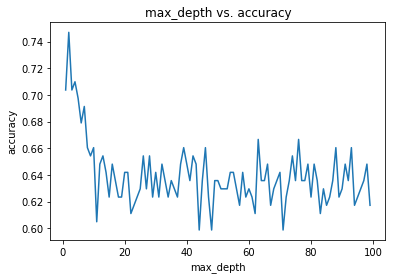

In [1155]:
print(len(scores))
plt.plot(d_s, scores)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('max_depth vs. accuracy')
plt.show()

In [1156]:
#model
print('Creating DTree model using best depth')
dtree = tree.DecisionTreeClassifier(max_depth=best_depth)

#Feature Selection
print('Using feature selector')
del_list, best_acc = feature_selector(Xtr,Ytr,dtree,n=10)

print('Transforming the Train and Test data by deleting the features')
newXtrain = np.delete(Xtr,del_list, axis=1)
newXtest = np.delete(Xtest,del_list,axis=1)
dtree.fit(newXtrain, Ytr)
test_accuracy = dtree.score(newXtest,Ytest)
print('Test Accuracy = ',test_accuracy)

Creating DTree model using best depth
Using feature selector
Default Score =  0.7469135802469136
No additional feature removal performs better
Features to be deleted:  [] Best accuracy on dev after deleting features:  0.7469135802469136
Transforming the Train and Test data by deleting the features
Test Accuracy =  0.6633663366336634


In [1157]:
#KNN Tuning
print('Tuning KNN')
best_score = 0
best_k = 0
scores =[]
k_s = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain,Ytrain)
    score = (knn.score(Xdev,Ydev))
    scores.append(score)
    k_s.append(k)
    if(score>best_score):
        best_score = score
        best_k = k

#print(accuracies)
#optimum_k = np.argmax(accuracies)+1
print('Optimum k = ',best_k)
print('Accuracy on Dev data using Optimum k= ',best_score)





Tuning KNN
Optimum k =  41
Accuracy on Dev data using Optimum k=  0.7283950617283951


49


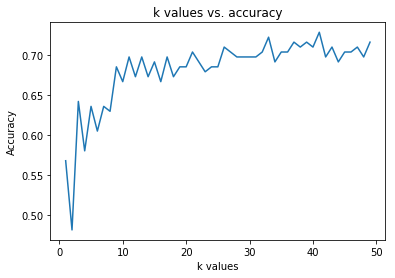

In [1158]:
print(len(scores))
plt.plot(k_s, scores)
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('k values vs. accuracy')
plt.show()

In [1159]:
#Model
print('Creating KNN model using optimum k')
knn  = KNeighborsClassifier(n_neighbors=best_k)

#Feature Selection
print('Using feature selector')
del_list, best_acc = feature_selector(Xtr,Ytr,knn,10)
print('Transforming the Train and Test data by deleting the features')
newXtrain = np.delete(Xtr,del_list, axis=1)
newXtest = np.delete(Xtest,del_list,axis=1)
knn.fit(newXtrain,Ytr)
test_accuracy = knn.score(newXtest,Ytest)
print('Test Accuracy = ',test_accuracy)



Creating KNN model using optimum k
Using feature selector
Default Score =  0.7283950617283951
No additional feature removal performs better
Features to be deleted:  [79, 60, 17] Best accuracy on dev after deleting features:  0.7530864197530864
Transforming the Train and Test data by deleting the features
Test Accuracy =  0.7673267326732673


In [1160]:
#SVC Tuning
print('Tuning SVC')
print('Finding best gamma')
best_gamma = 0
best_score = 0
scores1 =[]
g_s = []
arr = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
for g in arr:
    svc_classifier = SVC(C=3.0,gamma=g)
    svc_classifier.fit(Xtr, Ytr)
    score =(svc_classifier.score(Xtest,Ytest))
    scores1.append(score)
    g_s.append(g)
    
    if(score>best_score):
        best_score = score
        best_gamma = g
        

#print('best score = ', best_score)
max_score = 0
best_c = 0
scores2 =[]
c_s = []
for c in range(1,101):
    svc_classifier = SVC(C=c, gamma=best_gamma)
    svc_classifier.fit(Xtrain, Ytrain)
    score = svc_classifier.score(Xdev,Ydev)
    scores2.append(score)
    c_s.append(c)
    if(score > max_score):
        #print('better score found', score, 'C=',c)
        max_score = score
        best_c = c
print('best gamma=', best_gamma)
print('best C = ',best_c)
print('Accuracy on Dev data using best gamma and best c = ', max_score)



Tuning SVC
Finding best gamma
best gamma= 0.01
best C =  17
Accuracy on Dev data using best gamma and best c =  0.7530864197530864


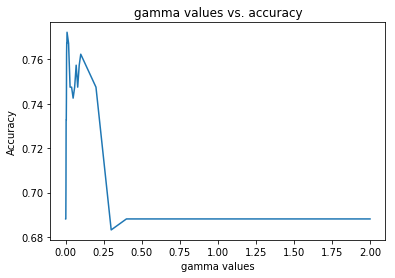

In [1161]:
plt.plot(g_s,scores1)
plt.xlabel('gamma values')
plt.ylabel('Accuracy')
plt.title('gamma values vs. accuracy')
plt.show()



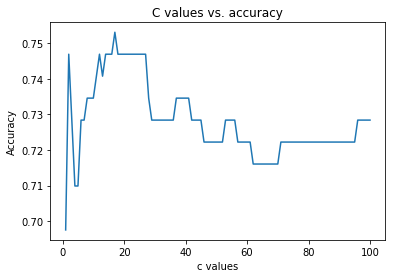

In [1162]:
plt.plot(c_s,scores2)
plt.xlabel('c values')
plt.ylabel('Accuracy')
plt.title('C values vs. accuracy')
plt.show()

In [1163]:
#Model
svc_classifier = SVC(C=best_c, gamma=best_gamma)
print('Using Feature Selection')
del_list, best_acc = feature_selector(Xtr,Ytr,svc_classifier,n=10)

#Transforming data
print('Transforming Train and Test data')
newXtrain = np.delete(Xtr,del_list, axis=1)
newXtest = np.delete(Xtest,del_list,axis=1)

###
# trainx1 = newXtrain[:int(0.8*len(newXtrain))]
# trainy1 = Ytr[:int(0.8*len(newXtrain))]
# devx1 = newXtrain[int(0.8*len(newXtrain)):]
# devy1 = Ytr[int(0.8*len(newXtrain)):]

# svc_classifier.fit(trainx1,trainy1)
# predicted = svc_classifier.predict(devx1)
# print(predicted)
# print(devy1)

# print(devx1[0])
# print(devx1[1])
# print(devx1[5])
# print(devx1[7])

###
svc_classifier.fit(newXtrain, Ytr)


test_accuracy = svc_classifier.score(newXtest,Ytest)
print('Test Accuracy = ',test_accuracy)

Using Feature Selection
Default Score =  0.7530864197530864
No additional feature removal performs better
Features to be deleted:  [32, 110] Best accuracy on dev after deleting features:  0.7716049382716049
Transforming Train and Test data
Test Accuracy =  0.7376237623762376


In [1164]:
print('Saving Classifier')
pickle.dump(svc_classifier,open('final_classifier','wb'))

Saving Classifier


In [1165]:
del_list = np.array(del_list)
np.save('del-features.npy',del_list)

In [1166]:
newl = np.load('del-features.npy')
print(newl)

[ 32 110]


In [1167]:
print('Loading Classifier')
clf = pickle.load(open('final_classifier','rb'))
#predicted_values = clf.predict(newXtest)

test_accuracy = clf.score(newXtest,Ytest)
print('Test Accuracy = ',test_accuracy)

Loading Classifier
Test Accuracy =  0.7376237623762376
